# Neural Network for Regression | Funda dataset

## Importing modules

In [1]:
import IPython
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

## 1. Funda_2018

In [9]:
# Load funda_2018 data
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
funda_2018 = data_loader.load_funda_data_2018()
print("Funda 2018 data loaded")

Funda 2018 data loaded


In [10]:
# Clean funda_2018 data
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
funda_2018_cleaned = data_cleaner.cleaned_funda_2018(data=funda_2018)

Funda data 2018 cleaned


In [4]:
funda_2018_cleaned.head(5)

,publicationDate,zipcode,sellingPrice,fullDescription,houseType,categoryObject,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,energylabelClass,surface,sellingDate,sellingTime
0,2018-07-31,1774PG,139000.0,"Ruimte, vrijheid, en altijd het water en de we...","woonboot,vrijstaandewoning,",Woonhuis,1975,1,NaN,3,0.0,0,62,2018-11-12,104
1,2018-09-24,7481LK,209000.0,Verrassend ruime tussenwoning nabij het centru...,"eengezinswoning,tussenwoning,",Woonhuis,1980,1,148.0,5,1.0,B,136,2018-08-30,-25
2,2018-08-02,1068MS,267500.0,- ENGLISH TRANSLATION - On the 21st of Septemb...,"tussenverdieping,appartement,",Appartement,2005,0,NaN,3,0.0,0,70,2018-11-23,113
3,2018-08-04,5628EN,349000.0,Wonen in een zeer royaal bemeten geschakelde 2...,"eengezinswoning,geschakelde2-onder-1-kapwoning,",Woonhuis,1973,1,244.0,5,0.0,0,144,2018-12-14,132
4,2018-08-05,7731TV,495000.0,Landgoed Junne is een eeuwenoud landgoed en li...,"woonboerderij,vrijstaandewoning,",Woonhuis,1900,0,4500.0,8,1.0,0,323,2018-12-06,123


## Explore correlations

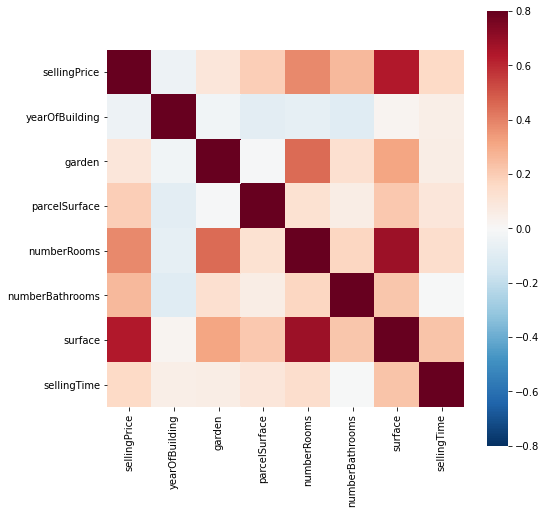

In [5]:
# Compute correlation
correlation_matrix = funda_2018_cleaned.corr()

# Open figure container
fig = plt.figure(figsize = (8,8))
# Make color heatmap (library seaborn)
sb.heatmap(correlation_matrix, vmax = 0.8, vmin=-0.8, square = True, cmap='RdBu_r')
# Display plot
plt.show()

## Prepare features funda_2018 for predicting the sales price

In [28]:
import datetime
# create column with publication day, month and year
funda_2018_cleaned['publicationDay'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).day
funda_2018_cleaned['publicationMonth'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).month
funda_2018_cleaned['publicationYear'] = pd.DatetimeIndex(funda_2018_cleaned['publicationDate']).year
# dummy code categoryObject & energylabelClass
pd.get_dummies(data=funda_2018_cleaned, columns=['categoryObject', 'energylabelClass'])
# drop columns publicationDate, sellingPrice, sellingTime and sellingDate
funda_2018_cleaned = funda_2018_cleaned.drop(columns=['publicationDate', 'sellingPrice', 'sellingTime', 'sellingDate'])

## Create new dataframe with houseTypes dummy codes

In [29]:
houseTypes_df = funda_2018_cleaned['houseType'].str.get_dummies(sep=",")

In [14]:
houseTypes_df.head(5)

,2-onder-1-kapwoning,OpenPortiek,OpenPortiek2,appartement,bedrijfs-ofdienstwoning,bel-etage,beneden+bovenwoning,benedenwoning,bovenwoning,bungalow,...,tussenverdieping,tussenwoning,verspringend,verzorgingsflat,villa,vrijstaandewoning,waterwoning,wind/watermolen,woonboerderij,woonboot
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [30]:
houseTypes_df.columns

Index(['2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2', 'appartement',
       'bedrijfs-ofdienstwoning', 'bel-etage', 'beneden+bovenwoning',
       'benedenwoning', 'bovenwoning', 'bungalow', 'corridorflat',
       'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis', 'dubbelbovenhuis',
       'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tussenverdieping', 'tussenwoning',
       'verspringend', 'verzorgingsflat', 'villa', 'vrijstaandewoning',
       'waterwoning', 'wind/watermolen', 'woonboerderij', 'woonboot'],
      dtype='object')

## Join houseType_df with funda_2018

In [31]:
joined_df = funda_2018_cleaned.join(houseTypes_df, how='right').drop(axis=1, columns='houseType')

In [32]:
joined_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'publicationDay', 'publicationMonth',
       'publicationYear', '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'bel-etage',
       'beneden+bovenwoning', 'benedenwoning', 'bovenwoning', 'bungalow',
       'corridorflat', 'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis',
       'dubbelbovenhuis', 'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tusse

In [11]:
#joined_df.head(5)

## 2. Zipcode data

In [33]:
# Load zipcode data
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
zipcode_data = data_loader.load_cbs_postcodes()
print("Zipcode data loaded")

Zipcode data loaded


In [34]:
# Clean zipcode data
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
zipcode_data_cleaned = data_cleaner.clean_cbs_postcodes(data=zipcode_data)
zipcode_data_cleaned.head(5)

,zipcode,NeighborhoodCode,DistrictCode,Municipalitycode
0,1011AB,3630400,36304,363
1,1011AC,3630400,36304,363
2,1011AD,3630400,36304,363
3,1011AE,3630400,36304,363
4,1011AG,3630403,36304,363


## 3. Brt data

In [35]:
# load brt_2020
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
brt_data = data_loader.load_brt_2020()
print("Brt_data data loaded")

Brt_data data loaded


In [36]:
# clean brt_2020
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner
brt_data_cleaned = data_cleaner.clean_brt_2020(data=brt_data)
print("Brt_data cleaned")

Brt_data cleaned


In [37]:
brt_data_cleaned.columns

Index(['NeighborhoodCode', 'NeighborhoodName', 'Municipalitycode',
       'MunicipalityName', 'DistrictCode', 'DistrictName'],
      dtype='object')

# Joining csv files

In [38]:
# combine csv files funda_2018, pc6-gwb2020 (postcodes), join them on zipcode
funda_zipcode_df = joined_df.join(zipcode_data_cleaned.set_index('zipcode'), on='zipcode')

In [39]:
funda_zipcode_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'publicationDay', 'publicationMonth',
       'publicationYear', '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'bel-etage',
       'beneden+bovenwoning', 'benedenwoning', 'bovenwoning', 'bungalow',
       'corridorflat', 'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis',
       'dubbelbovenhuis', 'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tusse

In [40]:
# combine csv files funda_2018, pc6-gwb2020 and brt, join them on NeighborhoodCode
# right: use only keys from right frame, similar to a SQL right outer join; preserve key order.
funda_zipcode_brt_df = funda_zipcode_df.merge(brt_data_cleaned, on='NeighborhoodCode', how='right')

In [41]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'publicationDay', 'publicationMonth',
       'publicationYear', '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'bel-etage',
       'beneden+bovenwoning', 'benedenwoning', 'bovenwoning', 'bungalow',
       'corridorflat', 'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis',
       'dubbelbovenhuis', 'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tusse

In [42]:
# inspect combined dataframe
# funda_zipcode_brt_df.head(5)
# drop columns NeighborhoodCode, DistrictCode_x, Municipalitycode_x and exclude _y from columns names
funda_zipcode_brt_df = funda_zipcode_brt_df.drop(columns=['NeighborhoodCode', 'DistrictCode_x', 'Municipalitycode_x', 'NeighborhoodName', 'MunicipalityName', 'DistrictName']).rename(columns={'Municipalitycode_y':'Municipalitycode', 'DistrictCode_y':'DistrictCode'})

In [43]:
funda_zipcode_brt_df.head(5)

,zipcode,fullDescription,categoryObject,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,energylabelClass,surface,...,verspringend,verzorgingsflat,villa,vrijstaandewoning,waterwoning,wind/watermolen,woonboerderij,woonboot,Municipalitycode,DistrictCode
0,9901CJ,"Op een goede locatie gelegen, uitstekend onder...",Woonhuis,1936.0,1.0,363.0,6.0,0.0,0,120.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
1,9901BV,"Levensloopbestendig, verrassend en centraal wo...",Woonhuis,1977.0,1.0,679.0,4.0,2.0,0,162.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
2,9901CL,VRIJSTAAND / KARAKTERISTIEK / GROTE WONING / V...,Woonhuis,1936.0,1.0,1140.0,7.0,1.0,0,225.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
3,9901BS,Prachtig gelegen halfvrijstaande woning nabij ...,Woonhuis,1900.0,1.0,135.0,3.0,1.0,0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
4,9901AW,"Sint Annastraat 7, Appingedam.Een beeldbepalen...",Woonhuis,1906.0,0.0,149.0,5.0,0.0,G,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300


In [44]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'publicationDay', 'publicationMonth',
       'publicationYear', '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'bel-etage',
       'beneden+bovenwoning', 'benedenwoning', 'bovenwoning', 'bungalow',
       'corridorflat', 'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis',
       'dubbelbovenhuis', 'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tusse

## 4. Funda_2020 data 

In [45]:
# load funda_2020
from funda.load_data import DataLoader
data_loader = DataLoader(base_folder='C:\\Users\\User\\Google Drive\\Master DDB\\AI for Business\\product3team2')
funda_2020 = data_loader.load_funda_data_2020()
print("Funda_2020 data loaded")

Funda_2020 data loaded


In [47]:
# clean funda_2020
from funda.clean_data import DataCleaner
data_cleaner = DataCleaner()
funda_2020_cleaned = data_cleaner.clean_funda_2020(data=funda_2020)

Funda data 2020 cleaned


In [55]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface', 'publicationDay', 'publicationMonth',
       'publicationYear', '2-onder-1-kapwoning', 'OpenPortiek', 'OpenPortiek2',
       'appartement', 'bedrijfs-ofdienstwoning', 'bel-etage',
       'beneden+bovenwoning', 'benedenwoning', 'bovenwoning', 'bungalow',
       'corridorflat', 'dijkwoning', 'drive-inwoning', 'dubbelbenedenhuis',
       'dubbelbovenhuis', 'eengezinswoning', 'eindwoning', 'galerijflat',
       'geschakelde2-onder-1-kapwoning', 'geschakeldewoning', 'grachtenpand',
       'halfvrijstaandewoning', 'herenhuis', 'hoekwoning', 'hofjeswoning',
       'kwadrantwoning', 'landgoed', 'landhuis', 'maisonnette', 'paalwoning',
       'patiowoning', 'penthouse', 'portiekflat', 'portiekwoning',
       'semi-bungalow', 'serviceflat', 'souterrain', 'split-levelwoning',
       'stacaravan', 'studentenkamer', 'tusse

In [56]:
# Replace NaN in parcelSurface with the mean of the Municpality 
funda_zipcode_brt_df['parcelSurface'] = funda_zipcode_brt_df.groupby("Municipalitycode").transform(lambda x: x.fillna(x.mean()))


In [65]:
funda_zipcode_brt_df.head(10)

,zipcode,fullDescription,categoryObject,yearOfBuilding,garden,parcelSurface,numberRooms,numberBathrooms,energylabelClass,surface,...,verspringend,verzorgingsflat,villa,vrijstaandewoning,waterwoning,wind/watermolen,woonboerderij,woonboot,Municipalitycode,DistrictCode
0,9901CJ,"Op een goede locatie gelegen, uitstekend onder...",Woonhuis,1936.0,1.0,1936.0,6.0,0.0,0,120.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
1,9901BV,"Levensloopbestendig, verrassend en centraal wo...",Woonhuis,1977.0,1.0,1977.0,4.0,2.0,0,162.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
2,9901CL,VRIJSTAAND / KARAKTERISTIEK / GROTE WONING / V...,Woonhuis,1936.0,1.0,1936.0,7.0,1.0,0,225.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300
3,9901BS,Prachtig gelegen halfvrijstaande woning nabij ...,Woonhuis,1900.0,1.0,1900.0,3.0,1.0,0,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
4,9901AW,"Sint Annastraat 7, Appingedam.Een beeldbepalen...",Woonhuis,1906.0,0.0,1906.0,5.0,0.0,G,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
5,9901BH,"Compleet gerenoveerde, sfeervolle en moderne w...",Woonhuis,1900.0,1.0,1900.0,4.0,1.0,A,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
6,9901EN,*GROTENDEELS VERBOUWD *GROTE TUIN + ACHTEROM *...,Woonhuis,1900.0,1.0,1900.0,3.0,1.0,0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
7,9901AE,Royaal en karakteristiek appartement met ruime...,Appartement,1840.0,1.0,1840.0,5.0,1.0,0,220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
8,9901CG,ONDERHANDS VERKOCHT BINNEN ONS KLANTENBESTAND*...,Woonhuis,1964.0,1.0,1964.0,4.0,1.0,C,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GM0003,WK000300
9,9901CR,Sommige objecten laten zich nauwelijks - volle...,Woonhuis,1935.0,1.0,1935.0,7.0,2.0,0,230.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,GM0003,WK000300


In [69]:
funda_zipcode_brt_df = pd.get_dummies(funda_zipcode_brt_df, columns=['Municipalitycode', 'DistrictCode'])

In [70]:
funda_zipcode_brt_df.columns

Index(['zipcode', 'fullDescription', 'categoryObject', 'yearOfBuilding',
       'garden', 'parcelSurface', 'numberRooms', 'numberBathrooms',
       'energylabelClass', 'surface',
       ...
       'DistrictCode_WK197811', 'DistrictCode_WK197812',
       'DistrictCode_WK197813', 'DistrictCode_WK197814',
       'DistrictCode_WK197815', 'DistrictCode_WK197816',
       'DistrictCode_WK197817', 'DistrictCode_WK197818',
       'DistrictCode_WK197819', 'DistrictCode_WK197820'],
      dtype='object', length=3595)

In [ ]:
funda_zipcode_brt_df.head(5)